In [1]:
import pandas as pd
import re

In [2]:
#######
#pandas.read_fwf(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], colspecs='infer', widths=None, 
#infer_nrows=100, **kwds)
#Read a table of fixed-width formatted lines into DataFrame.
#Also supports optionally iterating or breaking of the file into chunks."""
########

#df = pd.read_fwf("WhatsApp Chat with #AskPyFesh.txt", encoding="utf-8", header=None)
#reads empty lines and returns them as Nan. Not pretty.

In [3]:
wats = pd.read_csv("WhatsApp Chat with #AskPyFesh.txt", delimiter="\t", header=None)

In [4]:
wats.shape

(1143, 1)

In [5]:
wats.columns = ["message"]

In [6]:
wats.head()

,message
0,"10/22/19, 1:26 PM - Messages to this group are..."
1,"10/22/19, 1:26 PM - You created group ""#AskPyF..."
2,"10/22/19, 1:28 PM - MaduDOMINIC: Ask Python Fesh"
3,"10/22/19, 1:28 PM - MaduDOMINIC: Odi ok"
4,"10/22/19, 1:28 PM - MaduDOMINIC: Anyi ebidogo"


In [7]:
wats.tail()

,message
1138,"11/7/19, 7:02 AM - Paschal Chukwuemeka Amah: G..."
1139,Been quite here.
1140,"11/7/19, 7:03 AM - Paschal Chukwuemeka Amah: S..."
1141,"11/7/19, 7:04 AM - Paschal Chukwuemeka Amah: <..."
1142,"11/7/19, 7:06 AM - Paschal Chukwuemeka Amah: R..."


In [8]:
#Convert to list for flexibility
g1 = wats.message.to_list()

# Initial Clean up

In [9]:
#Merge messages that belong together
msgs = [] #message container
pos = 0 #counter for position of msgs in the container
"""
Flow:
For every line, see if it matches the expression which is starting with the format "number(s)+slash" eg "12/"
If it does, it is a new line of conversion as they begin with dates, add it to msgs container
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line.
"""
for i, line in enumerate(g1):
    if re.findall("\A\d+[/]", line):	
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos-1] + ". " + line
        msgs.append(take)
        msgs.pop(pos-1)

len(msgs)

662

In [10]:
len(g1)
for i, line in enumerate(g1[:10]):
    print(i, line)

0 10/22/19, 1:26 PM - Messages to this group are now secured with end-to-end encryption. Tap for more info.
1 10/22/19, 1:26 PM - You created group "#AskPyFesh "
2 10/22/19, 1:28 PM - MaduDOMINIC: Ask Python Fesh
3 10/22/19, 1:28 PM - MaduDOMINIC: Odi ok
4 10/22/19, 1:28 PM - MaduDOMINIC: Anyi ebidogo
5 10/22/19, 1:30 PM - You changed the group description
6 10/22/19, 1:30 PM - Paschal Chukwuemeka Amah: Hehe.
7 Na so.
8 10/22/19, 1:30 PM - Paschal Chukwuemeka Amah: Trying to find the next big pythonista.
9 So, historically na Igwe enter the group first.


In [12]:
len(msgs)
for i, line in enumerate(msgs[:10]):
    print(i, line)

0 10/22/19, 1:26 PM - Messages to this group are now secured with end-to-end encryption. Tap for more info.
1 10/22/19, 1:26 PM - You created group "#AskPyFesh "
2 10/22/19, 1:28 PM - MaduDOMINIC: Ask Python Fesh
3 10/22/19, 1:28 PM - MaduDOMINIC: Odi ok
4 10/22/19, 1:28 PM - MaduDOMINIC: Anyi ebidogo
5 10/22/19, 1:30 PM - You changed the group description
6 10/22/19, 1:30 PM - Paschal Chukwuemeka Amah: Hehe.. Na so.
7 10/22/19, 1:30 PM - Paschal Chukwuemeka Amah: Trying to find the next big pythonista.. So, historically na Igwe enter the group first.
8 10/22/19, 1:31 PM - Paschal Chukwuemeka Amah: I'll delete all this sha just before I start sharing links and having people join.
9 10/22/19, 1:34 PM - You changed this group's icon


In [13]:
intro_lines = [line.lower() for line in msgs if "Intro" in line]

In [14]:
len(intro_lines)

51

In [15]:
intro_lines

['10/22/19, 8:33 pm - chigozie njoku d-gasm: #askfeshintro. name: chigozie njoku. city of residence: lagos',
 '10/22/19, 8:39 pm - +234 805 052 8131: #askfeshintro. taofik sanni. lagos',
 '10/22/19, 8:41 pm - +234 818 847 1990: hi everyone i am ikechukwu, based in lagos #askfeshintro',
 "10/22/19, 8:43 pm - +234 703 120 1331: hello all i'm adedamola i reside in lagos #askfeshintro",
 '10/22/19, 10:17 pm - paschal chukwuemeka amah: warm welcome to *#askpyfesh*! 😁. let us please tarry a while (24hrs) to allow folks to join in before we start off. this will give the majority of us the chance to start on the same page.. again, warm welcome.. - _this is fesh_ 🙇. #askfeshintro. location: lagos.',
 '10/22/19, 11:08 pm - +234 803 509 7061: #askfeshintro. gambo nurudeen bello. from ilorin',
 '10/22/19, 11:09 pm - +234 903 895 4127: #askfeshintro . emeka boris ama. from port harcourt',
 '10/22/19, 11:11 pm - +234 806 235 5136: #askfeshintro.   george peter,  lagos',
 '10/22/19, 11:38 pm - +234 7

In [16]:
df = pd.DataFrame()
df["messages"] = intro_lines

In [17]:
df.to_csv("cleaned_intro.csv")

In [18]:
date = []
time = []
number = []
msg = []
counter = 0
for line in msgs:
    x = line.split()
    #Get the date
    dating = x[0]
    date.append(dating.replace(',',''))
    
    #Get the time
    timing = x[1] + " " +x[2]
    time.append(timing)
    
    #Get number
    num = "".join(x[4:8])
    number.append(num.replace(':', ''))
    
    #Get message
    msging = " ".join(x[8:])
    msg.append(msging)
    
#     counter += 1
#     print(counter)

print(len(date), len(time), len(number), len(msg))

662 662 662 662


# IIM Template

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
#Read txt data file 
with open("WhatsApp Chat with #AskPyFesh.txt", "r", encoding = "utf-8") as file:
    chats = file.readlines()
print(len(chats))

1389


In [3]:
#Remove new lines
chats = [line.strip() for line in chats]
chats[:10]
print(len(chats))

#Clean out the join notification lines
apfesh = [line for line in chats if not "joined using this" in line]

#Further cleaning
#Remove empty lines
apfesh = [line for line in apfesh if len(line) > 1]
print(len(apfesh))

1389
1052


In [4]:
#Remove more auto lines
apfesh = [line for line in apfesh if not "You changed" in line]
print(len(apfesh))

1048


In [5]:
#Remove even more auto lines
apfesh = [line for line in apfesh if not "You revoked" in line]
print(len(apfesh))

1045


In [6]:
#Drop 'left-ers'
left = [line for line in apfesh if line.endswith("left")]
left

['10/23/19, 8:42 AM - +263 77 221 3302 left',
 '11/2/19, 3:52 PM - +234 703 553 4253 left',
 '11/4/19, 9:48 AM - +44 7436 909012 left']

In [7]:
#Remove all that 'left'
apfesh = [line for line in apfesh if not line.endswith("left")]
print(len(apfesh))

1042


In [8]:
#Merge messages that belong together
msgs = [] #message container
pos = 0 #counter for position of msgs in the container
"""
Flow:
For every line, see if it matches the expression which is starting with the format "number(s)+slash" eg "12/"
If it does, it is a new line of conversion as they begin with dates, add it to msgs container
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line.
"""
for line in apfesh:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos-1] + ". " + line
        msgs.append(take)
        msgs.pop(pos-1)

len(msgs)

566

In [9]:
msgs[:5]

['10/22/19, 1:26 PM - Messages to this group are now secured with end-to-end encryption. Tap for more info.',
 '10/22/19, 1:26 PM - You created group "#AskPyFesh "',
 '10/22/19, 1:28 PM - MaduDOMINIC: Ask Python Fesh',
 '10/22/19, 1:28 PM - MaduDOMINIC: Odi ok',
 '10/22/19, 1:28 PM - MaduDOMINIC: Anyi ebidogo']

In [10]:
#Drop first two lines: auto msg
msgs = msgs[2:]
len(msgs)

564

In [11]:
#peep message format so far
msgs[50:55]

['10/23/19, 1:03 PM - +234 706 527 3604: My name is Tolu Oladipo. I reside in Lagos state #AskFreshIntro',
 '10/23/19, 4:00 PM - Ojei Toritsemoshe D-GASM: #AskFeshIntro. Ojei Tooritse. Lagos',
 '10/23/19, 7:05 PM - Paschal Chukwuemeka Amah: _3/3 Repeat message_. Warm welcome to *#AskPyFesh*! 😁. In an hour we shall revoke the join link and open the floor.. If you have not, and would want to be enumerated, drop your first message with the tag _*#AskPyFeshIntro*_ with your preferred name and location.. *Upcoming Event*. _*Time*_: 22:15hrs GMT* (10:15pm Lagos Time). _*Agenda*_: Guidance on getting your computer ready to write the language.. _*Recommended Tools*_: Your laptop or desktop and a working Internet connection.. Again, warm welcome.. - == _This is Fesh_ 🙇. !=_Fresh_ 😀',
 '10/23/19, 7:07 PM - Obiora Michael D-GASM: Mike, Surulere Lagos #AskPyFeshIntro',
 '10/23/19, 7:08 PM - +234 805 052 8131: What if my laptop can not connect to WiFi, what do I do?']

In [12]:
# #########################
# #Cleaning drawing board
# #########################
# for i, line in enumerate(msgs):
#     print(line)
#     x = line.split()
#     num = " ".join(x[3:9])
#     print(num)
#     match = re.search(r"- ([^']*):", num).group(1)
#     part = line.partition(match)[2] #partition according to the match and extract the last part
#     print(i, match, "\n")

In [13]:
msgs[34:40]

['10/23/19, 8:14 AM - +234 701 291 2307: #AskFreshintro. Joseph Ojo. Oyo',
 '10/23/19, 8:15 AM - +234 708 884 5567: #AskFreshintro. Bamgbose Elizabeth. Lagos',
 '10/23/19, 8:22 AM - +234 903 182 7815: #AskFreshintro. Samson Adejoro. Lagos',
 '10/23/19, 8:28 AM - +34 689 00 06 09: #AskFreshintro Ade Madrid',
 '10/23/19, 8:30 AM - +234 706 444 3217: #AskPyFeshIntro. Chuks. Lagos',
 '10/23/19, 8:35 AM - Francis Obasi D-GASM: #AskFreshintro. Francis Obasi. Lagos']

In [14]:
#make arrays of different parts of the messages
date = []
time = []
number = []
msg = []
counter = 0
for line in msgs:
    x = line.split()
    #Get the date
    dating = x[0]
    date.append(dating.replace(',',''))
    
    #Get the time
    timing = x[1] + " " +x[2]
    time.append(timing)
    
    #Get number
    num = " ".join(x[3:9]) #the parts numbers/names fall in
    match = re.search(r"- ([^']*):", num).group(1) #match between '- ' and ':' where they are per se
    number.append(match)
    
    #Get message
    #num = " ".join(x[3:8]) #num/name position
    #match = re.search(r"- ([^']*):", num).group(1) #isolate the num/name per se
    part = line.partition(match)[2] #partition according to the match and extract the last part, the msg
    msging = part[2:] #strip off the first two characters as they are ": "
    msg.append(msging)
    
#     counter += 1
#     print(counter)

print(len(date), len(time), len(number), len(msg))

564 564 564 564


In [15]:
number = [line.replace('Paschal Chukwuemeka Amah', 'Fesh') for line in number]
number[:5]

['MaduDOMINIC', 'MaduDOMINIC', 'MaduDOMINIC', 'Fesh', 'Fesh']

In [16]:
#Put in a dataframe
apfesh_df = pd.DataFrame()
apfesh_df["date"] = date
apfesh_df["time"] = time
apfesh_df["number"] = number
apfesh_df["msg"] = msg

apfesh_df.head()

,date,time,number,msg
0,10/22/19,1:28 PM,MaduDOMINIC,Ask Python Fesh
1,10/22/19,1:28 PM,MaduDOMINIC,Odi ok
2,10/22/19,1:28 PM,MaduDOMINIC,Anyi ebidogo
3,10/22/19,1:30 PM,Fesh,Hehe.. Na so.
4,10/22/19,1:30 PM,Fesh,"Trying to find the next big pythonista.. So, h..."


Fesh                 214
+234 803 604 4312     53
+234 812 053 1560     29
+234 903 182 7815     22
+234 703 080 5323     16
Name: number, dtype: int64


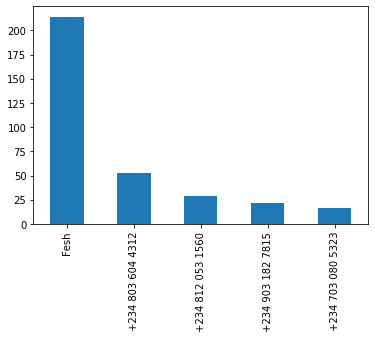

In [17]:
top5messengers = apfesh_df.number.value_counts(ascending=False).head()
print(top5messengers)
top5messengers.plot(kind="bar")

Fesh                 214
+234 803 604 4312     53
+234 812 053 1560     29
+234 903 182 7815     22
+234 703 080 5323     16
Name: number, dtype: int64


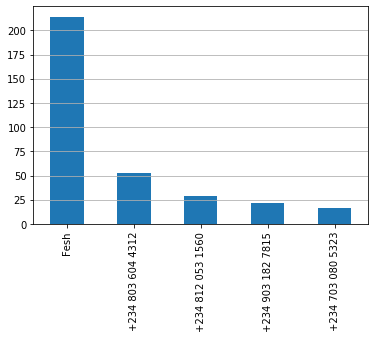

In [18]:
print(top5messengers)
fig, ax2 = plt.subplots()
top5messengers.plot(kind='bar',ax=ax2, fontsize=10, sort_columns=True)
ax2.grid(axis='y')
plt.show()